In [15]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getCSV(csv):
    dfl = pd.read_csv(csv)
    return dfl
df = getCSV(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\FarmBook.csv') 
print(df)

           Statistic Label  Census Year       County       Economic Size  \
0    Agricultural Holdings         2020    Co. Clare  All economic sizes   
1    Agricultural Holdings         2020    Co. Clare    Less than €4,000   
2    Agricultural Holdings         2020    Co. Clare     €4,000 - €8,000   
3    Agricultural Holdings         2020    Co. Clare    €8,000 - €15,000   
4    Agricultural Holdings         2020    Co. Clare   €15,000 - €25,000   
..                     ...          ...          ...                 ...   
203  Agricultural Holdings         2020  Co. Wexford    €8,000 - €15,000   
204  Agricultural Holdings         2020  Co. Wexford   €15,000 - €25,000   
205  Agricultural Holdings         2020  Co. Wexford   €25,000 - €50,000   
206  Agricultural Holdings         2020  Co. Wexford  €50,000 - €100,000   
207  Agricultural Holdings         2020  Co. Wexford       Over €100,000   

       UNIT  VALUE  
0    Number   6297  
1    Number   1188  
2    Number   1061  
3  

In [54]:
size = "Less than €4,000"
filtered_df = df[df['Economic Size']==size]
filtered_df['County'] = filtered_df['County'].apply(lambda x: x[4:].upper())
print(filtered_df)

           Statistic Label  Census Year     County     Economic Size    UNIT  \
1    Agricultural Holdings         2020      CLARE  Less than €4,000  Number   
9    Agricultural Holdings         2020       CORK  Less than €4,000  Number   
17   Agricultural Holdings         2020      CAVAN  Less than €4,000  Number   
25   Agricultural Holdings         2020     CARLOW  Less than €4,000  Number   
33   Agricultural Holdings         2020    DONEGAL  Less than €4,000  Number   
41   Agricultural Holdings         2020     DUBLIN  Less than €4,000  Number   
49   Agricultural Holdings         2020     GALWAY  Less than €4,000  Number   
57   Agricultural Holdings         2020    KILDARE  Less than €4,000  Number   
65   Agricultural Holdings         2020   KILKENNY  Less than €4,000  Number   
73   Agricultural Holdings         2020      KERRY  Less than €4,000  Number   
81   Agricultural Holdings         2020   LONGFORD  Less than €4,000  Number   
89   Agricultural Holdings         2020 

C:\Users\Tom\AppData\Local\Temp\ipykernel_9556\699904801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['County'] = filtered_df['County'].apply(lambda x: x[4:].upper())


In [55]:
counties_shapefile = gpd.read_file(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\Ireland_Counties\Counties___Ungen_2019.shp')
merged_data = counties_shapefile.merge(filtered_df, how='left', left_on='ENGLISH', right_on='County')


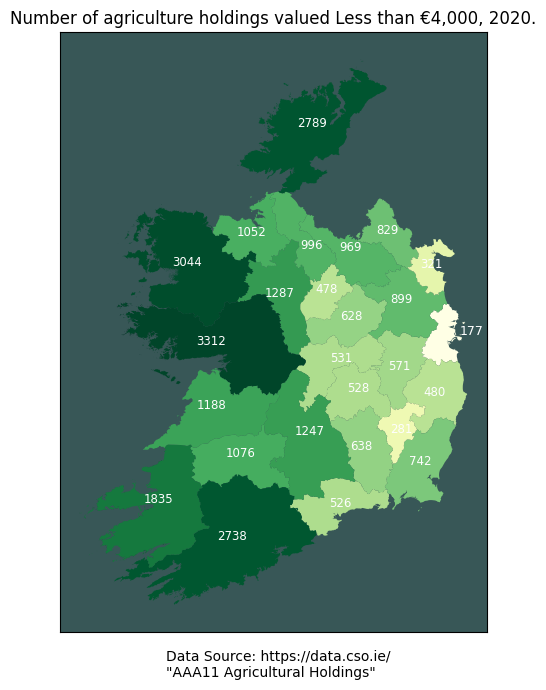

In [56]:
def plotIreland(data, savefig):
    fig, ax = plt.subplots(1,1,figsize=(12,8))

    data['scaled_value'] = np.log1p(data['VALUE'])
    
    data.plot(column='scaled_value', cmap='YlGn', linewidth=0.8, ax=ax, legend=False)

    text_color = "#FEFEFE"
    font_size = 8.5
    for idx,row in data.iterrows():
        raw_pop_of_county = int(row['VALUE'])
        if row['ENGLISH'] == "DUBLIN":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+23000, row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color="#FFFFFF", 
                            fontsize=font_size+.5, 
                            ha='center')
        elif row['ENGLISH'] == "OFFALY":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X'], row['CENTROID_Y']+9000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "CORK":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+14000, row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "WESTMEATH":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+4000, row['CENTROID_Y']-3000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "SLIGO":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X'], row['CENTROID_Y']-5000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "ROSCOMMON":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+4000, row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "LEITRIM":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+7000, row['CENTROID_Y']-10000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "KERRY":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+12000, row['CENTROID_Y']+3000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "GALWAY":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X'], row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        else:
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X'], row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')  # Adjust ha and va as needed
    title_string = "Number of agriculture holdings valued "+size+", 2020."
    ax.set_title(title_string)

    ax.set_facecolor('#385757') 
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)
    plt.text(0.25, -0.075, "Data Source: https://data.cso.ie/ \n\"AAA11 Agricultural Holdings\"", ha='left', transform=ax.transAxes)


    if savefig == True:
        plt.savefig("FarmsCounty-"+size+".png")

    plt.show()
plotIreland(merged_data, True)